In [1]:
 !pip install langchain openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.9/343.9 kB 7.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.9 MB/s eta 0:00:00:00:0100:01
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI

### Data

Dataset of Titanic survivors

Download the data from : https://www.kaggle.com/datasets/brendan45774/test-file

In [30]:
### /content/train/ is specific to GoogleDrive, Use whatever location you have stored the data in
df = pd.read_csv('/Users/scarlettattensil/Downloads/train.csv')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Build a Langchain Agent

In [32]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0, openai_api_key=openai_api_key),df, verbose=True)

In [33]:
openai = OpenAI(temperature=0.0, openai_api_key=openai_api_key)


In [34]:
## Check the OPenAI Model Name
openai.model_name


'text-davinci-003'

# Data Analysis

## 1. Metadata Extraction and Exploration

In [35]:
results = agent("how many records are there? Give me rows and columns")




> Entering new AgentExecutor chain...
Thought: I need to find out the shape of the dataframe
Action: python_repl_ast
Action Input: df.shape
Observation: (891, 12)
Thought: I now know the final answer
Final Answer: There are 891 rows and 12 columns in the dataframe.

> Finished chain.


In [25]:
results = agent("What are Column names?")




> Entering new AgentExecutor chain...


Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-zeZ5poB0O6eiBhYGfDKTTOoO on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


Thought: I need to find out what the column names are
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-zeZ5poB0O6eiBhYGfDKTTOoO on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 I now know the final answer
Final Answer: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

> Finished chain.


In [ ]:
results = agent("Which columns are categorical and which are numeric?")




> Entering new AgentExecutor chain...
Thought: I need to figure out which columns are categorical and which are numeric.
Action: python_repl_ast
Action Input: df.dtypes
Observation: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Thought: I can see which columns are numeric and which are categorical.
Final Answer: The numeric columns are PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare. The categorical columns are Name, Sex, Ticket, Cabin, Embarked.

> Finished chain.


## 2. Basic Exploration

In [26]:
results = agent("Are there any missing values in columns")




> Entering new AgentExecutor chain...


Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-zeZ5poB0O6eiBhYGfDKTTOoO on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


Thought: I need to check for missing values
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-zeZ5poB0O6eiBhYGfDKTTOoO on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-zeZ5poB0O6eiBhYGfDKTTOoO on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I now know the final answer
Final Answer: Yes, there are missing values in the Age, Fare, and Cabin columns.

> Finished chain.


In [27]:
results = agent("What percentage of the columns have missing values")




> Entering new AgentExecutor chain...
Thought: I need to figure out how many columns have missing values
Action: python_repl_ast
Action Input: df.isnull().sum()/len(df)
Observation: PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64
Thought: I now know the final answer
Final Answer: 78.2297%

> Finished chain.


In [ ]:
results = agent("What is the frequency of unique values in sex and age column")




> Entering new AgentExecutor chain...
Thought: I need to find the unique values in the sex and age columns
Action: python_repl_ast
Action Input: df['Sex'].value_counts()
Observation: male      577
female    314
Name: Sex, dtype: int64
Thought: I need to find the unique values in the age column
Action: python_repl_ast
Action Input: df['Age'].value_counts()
Observation: 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
Thought: I now know the final answer
Final Answer: There are 577 unique values in the sex column and 88 unique values in the age column.

> Finished chain.


#### Outlier Detection



> Entering new AgentExecutor chain...
Thought: I need to visualize the data to find out
Action: python_repl_ast
Action Input: df.boxplot(column='Fare')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I can see the boxplot now
Final Answer: Yes, there are outliers in terms of Fare.

> Finished chain.


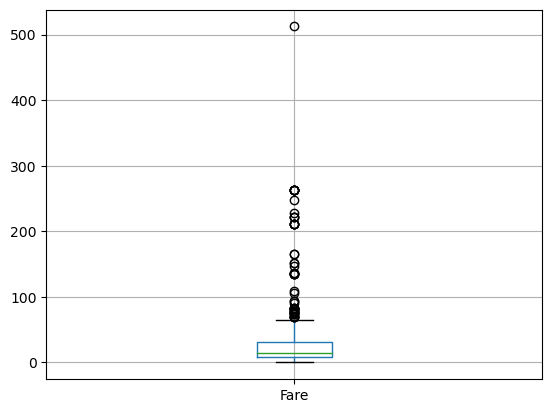

In [28]:
query = """Are there any outliers in terms of Fare? Find out using a boxplot"""
results = agent(query)

## 3. Probability Calculations

In [ ]:
results = agent("What is the probability of survivors")



> Entering new AgentExecutor chain...
Thought: I need to calculate the probability of survivors
Action: python_repl_ast
Action Input: df['Survived'].mean()
Observation: 0.3838383838383838
Thought: I now know the final answer
Final Answer: The probability of survivors is 0.3838383838383838.

> Finished chain.


In [36]:
results = agent("What is the probability of survival among male and females")



> Entering new AgentExecutor chain...
Thought: I need to calculate the probability of survival for each gender
Action: python_repl_ast
Action Input: df[df['Sex'] == 'male']['Survived'].mean()
Observation: 0.18890814558058924
Thought: I need to calculate the probability of survival for females
Action: python_repl_ast
Action Input: df[df['Sex'] == 'female']['Survived'].mean()
Observation: 0.7420382165605095
Thought: I now know the final answer
Final Answer: The probability of survival among males is 0.1889 and among females is 0.7420.

> Finished chain.


In [ ]:
results = agent("What is the probability of survival for females over 35 years of age")



> Entering new AgentExecutor chain...
Thought: I need to calculate the probability of survival for females over 35 years of age
Action: python_repl_ast
Action Input: df[(df['Sex'] == 'female') & (df['Age'] > 35)].Survived.mean()
Observation: 0.7808219178082192
Thought: I now know the final answer
Final Answer: The probability of survival for females over 35 years of age is 0.78.

> Finished chain.


## 4. Visualizations (Basic)

In [53]:
%matplotlib inline



> Entering new AgentExecutor chain...
Thought: I need to group the data by gender and count the number of survivors
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].sum()
Observation: Sex
female    233
male      109
Name: Survived, dtype: int64
Thought: I now have the data I need to create the bar plot
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].sum().plot.bar()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar plot showing the number of survivors by gender.

> Finished chain.


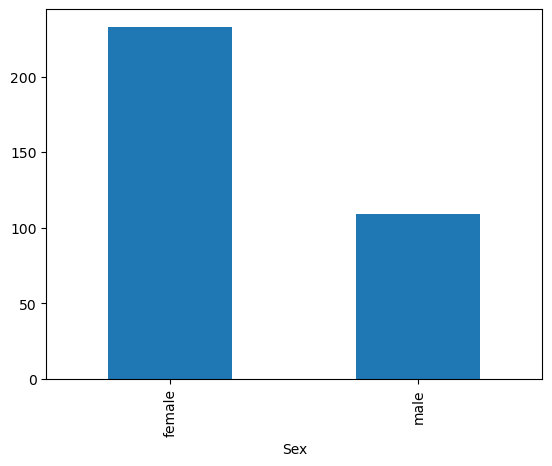

In [57]:
results = agent("Draw a bar plot to show number of survivors by gender")



> Entering new AgentExecutor chain...
Thought: I need to use the histogram function to draw the histogram
Action: python_repl_ast
Action Input: df['Fare'].hist(bins=range(0,100,10), color='red')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: The histogram of fares with bins from 0 to 10, 10 to 20, and so on in red color has been drawn.

> Finished chain.


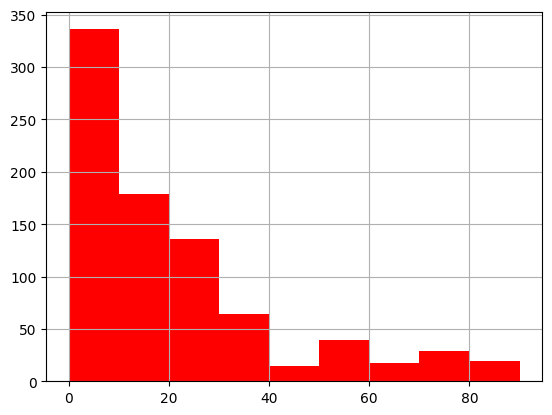

In [ ]:
results = agent("Draw a histgram on faees with bins from 0 to 10, 10 to 20, and so on. Make it in red color")

## 5. Comparing Distributions



> Entering new AgentExecutor chain...
Thought: I need to separate the dataframe into two dataframes, one for males and one for females
Action: python_repl_ast
Action Input: df_male = df[df['Sex'] == 'male']
Observation: 
Thought: I need to separate the dataframe into two dataframes, one for males and one for females
Action: python_repl_ast
Action Input: df_female = df[df['Sex'] == 'female']
Observation: 
Thought: I need to plot the distribution of fares for each dataframe
Action: python_repl_ast
Action Input: df_male['Fare'].plot.kde()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I need to plot the distribution of fares for each dataframe
Action: python_repl_ast
Action Input: df_female['Fare'].plot.kde()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: The distribution of fares between males and females can be compared using Kde plots.

> Finished chain.


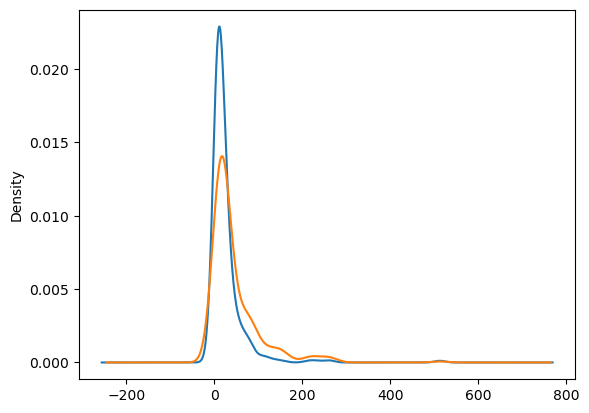

In [58]:
results = agent("Compare the distribution of fares between males and females with Kde plots")

## 6. Bivariate Analysis

In [ ]:
results = agent("What is the correlation between age and fare?")



> Entering new AgentExecutor chain...
Thought: I need to calculate the correlation between age and fare
Action: python_repl_ast
Action Input: df['Age'].corr(df['Fare'])
Observation: 0.0960666917690389
Thought: I now know the final answer
Final Answer: The correlation between age and fare is 0.096.

> Finished chain.




> Entering new AgentExecutor chain...
Thought: I need to use the seaborn library to plot the heatmap
Action: python_repl_ast
Action Input: import seaborn as sns
Observation: 
Thought: I need to get the correlation between the columns
Action: python_repl_ast
Action Input: df[['Survived', 'Age', 'Fare']].corr()
Observation:           Survived       Age      Fare
Survived  1.000000 -0.077221  0.257307
Age      -0.077221  1.000000  0.096067
Fare      0.257307  0.096067  1.000000
Thought: I need to plot the heatmap
Action: python_repl_ast
Action Input: sns.heatmap(df[['Survived', 'Age', 'Fare']].corr(), cmap='tab10')
Observation: Axes(0.125,0.11;0.62x0.77)
Thought: I now know the final answer
Final Answer: A heatmap of the correlation between survivor, age and fare, using the seaborn library and tab10 color palette.

> Finished chain.


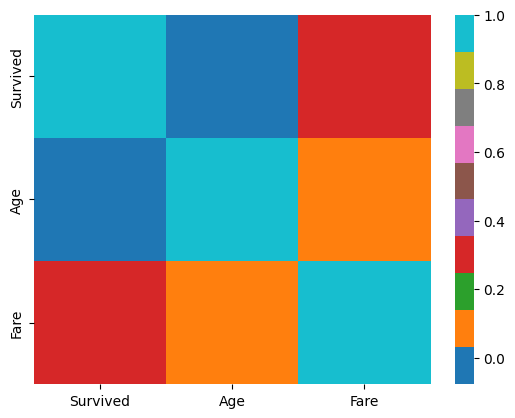

In [ ]:
results = agent("Plot is the correlation between survivor, age and fare in a heatmap, use the seaborn library for vizualization, and tab10 color palette")



> Entering new AgentExecutor chain...
Thought: I need to create a scatter plot with the data
Action: python_repl_ast
Action Input: df.plot.scatter(x='Age', y='Fare', c='Sex', colormap='Set3')
Observation: Axes(0.125,0.11;0.62x0.77)
Thought: I now know the final answer
Final Answer: A scatter plot between fare and age, color coded by sex, color palette Set3.

> Finished chain.


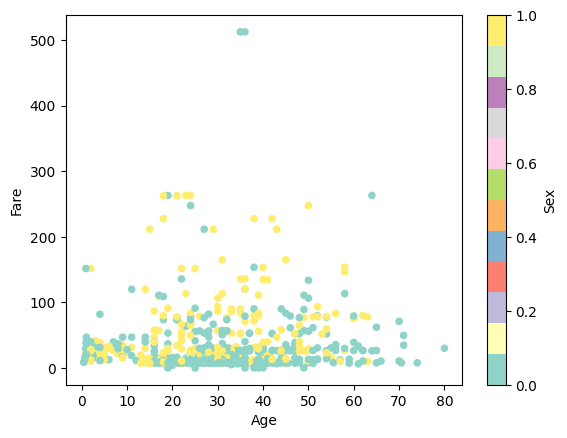

In [ ]:
results = agent("Show the scatter plot between fare and age, color coded by sex, color palette Set3")

## 7. Hypothesis Testing

From WikiPedia: A statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis. Hypothesis testing allows us to make probabilistic statements about population parameters.

The null hypothesis (H₀) signifies a declaration of lack of impact, absence of distinction, or absence of correlation within the population. On the other hand, the alternative hypothesis (H₁) signifies the contrary to the null hypothesis, indicating the existence of an impact, distinction, or correlation within the population.

Let us test the Hypothesis:

H₀: Fares of those who survived Titanic is same as those who did not survive.

H₁: Fares of those who survived Titanic is different than those who did not survive

In [ ]:
query = """Do t-test for the following hypothesis.
Null Hypothesis: Fares of those who survived Titanic is same as those who did not survive.
Alternate Hypothesis: Fares of those who survived Titanic is different than those who did not survive
"""
results = agent(query)



> Entering new AgentExecutor chain...

Thought: I need to separate the fares of those who survived and those who did not survive.
Action: python_repl_ast
Action Input: df[df['Survived'] == 1]['Fare']
Observation: 1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64
Thought: I need to separate the fares of those who did not survive.
Action: python_repl_ast
Action Input: df[df['Survived'] == 0]['Fare']
Observation: 0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64
Thought: I need to perform a t-test to compare the two groups.
Action: python_repl_ast
Action Input: stats.ttest_ind(df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare'])
Observation: NameError: name 'stats' is n

## 8. Clustering with K-means

In [ ]:
query = """Do a k-means clustering on the fares
"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to use the python_repl_ast tool to do the clustering
Action: python_repl_ast
Action Input: from sklearn.cluster import KMeans
Observation: 
Thought: I need to create the KMeans object
Action: python_repl_ast
Action Input: kmeans = KMeans(n_clusters=3)
Observation: 
Thought: I need to fit the data to the KMeans object
Action: python_repl_ast
Action Input: kmeans.fit(df['Fare'].values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Observation: KMeans(n_clusters=3)
Thought: I need to get the labels of the clusters
Action: python_repl_ast
Action Input: labels = kmeans.labels_
Observation: 
Thought: I now know the final answer
Final Answer: The labels of the clusters for the fares are stored in the variable `labels`.

> Finished chain.


## 9. Running Basic Models to generate model codes

In [ ]:
query = """Build a random forest model to predict the probability of survival given this data.. Give me the coefficients of all variales and tell me the accuracy metrics from the model evaluation
"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to build a model and evaluate it
Action: python_repl_ast
Action Input: from sklearn.ensemble import RandomForestClassifier
              
              
              
              
              
              
              
              
              
              
              
Observation: 
Thought: I need to fit the model to the data
Action: python_repl_ast
Action Input: X = df.drop(['Survived'], axis=1)
               y = df['Survived']
               model = RandomForestClassifier()
               model.fit(X, y)
Observation: IndentationError: unexpected indent (<unknown>, line 2)
Thought: I need to fix the indentation
Action: python_repl_ast
Action Input: X = df.drop(['Survived'], axis=1)
y = df['Survived']
model = RandomForestClassifier()
model.fit(X, y)
Observation: ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
Thought: I need to convert the string values to numerical values
Action: pytho

In [ ]:
query = """With survided as a target variable, compare the accuracy, precision and recall of logistic regression, xgboost, and random forest model"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to compare the accuracy, precision and recall of the three models
Action: python_repl_ast
Action Input: from sklearn.metrics import accuracy_score, precision_score, recall_score
Observation: 
Thought: I need to fit the models to the data
Action: python_repl_ast
Action Input: from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Fit the models
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Observation: NameError: name 'X_train' is not defined
Thought: I need to define X_train and y_train
Action: python_repl_ast
Action Input: X_train = df.drop(['Survived'], axis=1)
y_train = df['Survived']
Observation: 
Thought: I need to calculate the accuracy, precision and recall of the models
Action: python_repl_ast
Action Input: # Calculate t